In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.metrics import v_measure_score
import warnings

with warnings.catch_warnings(record=True):
    warnings.simplefilter("always")
    data = pd.read_excel('for_clustering.xlsx', sheet_name='CLUSTER_RESULT_TRAIN')

data = data.drop(columns = ['Age_group'],axis = 1)

data['Gender'] = data['Gender'].fillna(data['Gender'].mode()[0])
data['Age'] = data['Age'].fillna(data['Age'].mode()[0])

data = data.replace('F', 0)
data = data.replace('M', 1)

data = data.drop(columns = ['Id_client'],axis = 1)

data['Communication_3month'].value_counts()
data = data.drop(columns = ['Communication_3month'],axis = 1)

num_data = data[['InWeek_amount', 'InWeek_SKU', 'Checkinmonth_average',
       'Checkamount_mean', 'Count_transac', 'Total_amount', 'Total_SKU_qnt',
       'Count_departments', 'Count_shop', 'Count_city', 'Tenure',
       'SKU_meanbytransac', 'Amount_last6mnth', 'Check_qntlast6mnth',
       'SKU_price_mean', 'Age', 'Interval_visit', 'Days_pastvisit',
       'Cat_householdchem_qnt', 'Cat_householdchem_amount',
       'Cat_householdchem_share', 'Cat_careproducts_qnt',
       'Cat_careproducts_amount', 'Cat_careproducts_share',
       'Cat_toiletries_qnt', 'Cat_toiletries_amount', 'Cat_toiletries_share',
       'Cat_healthwellnes_qnt', 'Cat_healthwellnes_amount',
       'Cat_healthwellnes_share', 'Cat_babyprod_qnt', 'Cat_babyprod_amount',
       'Cat_babyprod_share', 'SKU_LastMonthqnt',
       'Checks_LastMonthqnt', 'Amount_LastMonth']]
num_data = pd.DataFrame(preprocessing.normalize(num_data), columns=num_data.columns)

bin_data = data[['Gender','Response_communcation','Discount', 'Discount_LastMonth']]

data = data.drop(columns = ['EM_SEGMENT'],axis = 1)
one_hot = pd.get_dummies(data['_SEGMENT_'])
one_hot.rename(columns = {1 : '_SEGMENT_1', 2 : '_SEGMENT_2', 3 : '_SEGMENT_3'}, inplace = True)

df = pd.concat([num_data, bin_data, one_hot], axis=1)

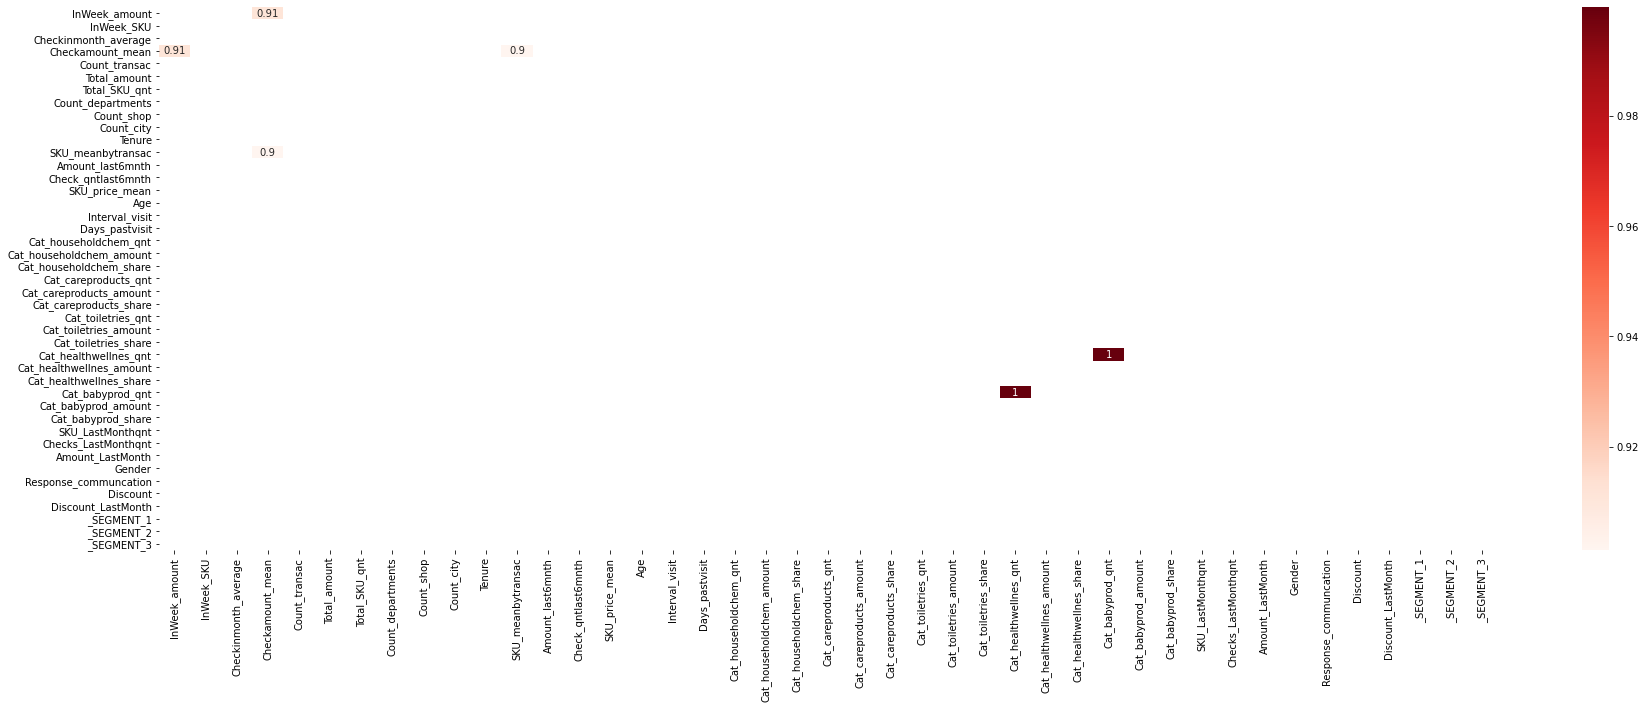

In [2]:
dfCorr = df.corr()
filteredDf = dfCorr[((dfCorr >= .9) | (dfCorr <= -.9)) & (dfCorr !=1.000)]
plt.figure(figsize=(30,10))
sns.heatmap(filteredDf, annot=True, cmap="Reds")
plt.show()

In [3]:
df = df.drop(columns = ['Cat_healthwellnes_qnt'],axis = 1)
df = df.drop(columns = ['Checkamount_mean'],axis = 1)

In [4]:
pca = PCA(n_components=5)
fit = pca.fit(df)
features = fit.transform(df)

print(fit.explained_variance_ratio_, sum(fit.explained_variance_ratio_))
print(features[0:5,:])

[0.34654771 0.24854022 0.17242738 0.14908571 0.05410538] 0.9707063812033696
[[ 0.39878787  0.03917152 -0.31411751 -0.76683005  0.01251811]
 [ 0.91050159  0.00995943 -0.32873264  0.09079045  0.0067505 ]
 [-0.60475266 -0.78131486 -0.22375699 -0.198342   -0.02679179]
 [ 0.91413999  0.0139079  -0.32364456  0.08943562  0.00115735]
 [-0.6976085   0.62633295 -0.38039254 -0.1018509  -0.19049687]]


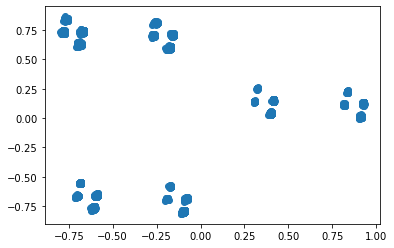

In [5]:
x_axis = features[:, 0]
y_axis = features[:, 1]

plt.scatter(x_axis, y_axis)
plt.show()

In [6]:
with warnings.catch_warnings(record=True):
    warnings.simplefilter("always")
    data = pd.read_excel('for_clustering.xlsx', sheet_name='CLUSTER_RESULT_TRAIN')

In [7]:
dbscan_cluster = DBSCAN()
dbscan_cluster.fit(features)
data['labels_24'] = dbscan_cluster.labels_

labels=dbscan_cluster.labels_
N_clus=len(set(labels))-(1 if -1 in labels else 0)
print('Estimated no. of clusters: %d' % N_clus)

n_noise = list(dbscan_cluster.labels_).count(-1)
print('Estimated no. of noise points: %d' % n_noise)

Estimated no. of clusters: 24
Estimated no. of noise points: 0


In [8]:
dbscan_cluster = DBSCAN(eps=0.99, min_samples=10)
dbscan_cluster.fit(features)
data['labels_6'] = dbscan_cluster.labels_

labels=dbscan_cluster.labels_
N_clus=len(set(labels))-(1 if -1 in labels else 0)
print('Estimated no. of clusters: %d' % N_clus)

n_noise = list(dbscan_cluster.labels_).count(-1)
print('Estimated no. of noise points: %d' % n_noise)

Estimated no. of clusters: 6
Estimated no. of noise points: 0


In [9]:
dbscan_cluster = DBSCAN(eps=0.999, min_samples=10)
dbscan_cluster.fit(features)
data['labels_3'] = dbscan_cluster.labels_

labels=dbscan_cluster.labels_
N_clus=len(set(labels))-(1 if -1 in labels else 0)
print('Estimated no. of clusters: %d' % N_clus)

n_noise = list(dbscan_cluster.labels_).count(-1)
print('Estimated no. of noise points: %d' % n_noise)

Estimated no. of clusters: 3
Estimated no. of noise points: 0


In [10]:
data

,Id_client,InWeek_amount,InWeek_SKU,Checkinmonth_average,Checkamount_mean,Count_transac,Total_amount,Total_SKU_qnt,Count_departments,Count_shop,...,SKU_LastMonthqnt,Checks_LastMonthqnt,Amount_LastMonth,Discount,Discount_LastMonth,_SEGMENT_,EM_SEGMENT,labels_24,labels_6,labels_3
0,5743,269.5328,46,2,102.9252,119,12398.51,1114,26,4,...,60,12,963.01,1,1,2,2,0,0,0
1,5756,359.9902,36,4,100.2813,130,12959.65,1024,29,3,...,91,15,1534.69,1,1,2,2,1,1,0
2,5781,329.3200,9,4,102.2027,29,2963.88,170,24,1,...,13,2,1514.48,1,1,3,3,2,2,1
3,5801,385.8105,51,8,48.8550,404,19676.34,2486,33,3,...,68,35,1872.24,1,1,2,2,1,1,0
4,5808,310.2800,8,4,108.5789,25,2482.24,255,26,2,...,22,3,557.97,1,1,1,1,3,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27503,822495,334.3064,17,2,193.4472,31,6164.92,317,29,1,...,27,4,916.60,1,1,3,3,2,2,1
27504,822844,214.9182,17,2,169.9322,21,3653.61,412,25,1,...,37,5,488.53,1,1,1,1,3,3,2
27505,823011,530.7692,13,2,271.0285,25,7509.19,434,19,1,...,33,3,1100.92,1,0,3,3,21,2,1
27506,823218,374.4395,23,2,254.5211,33,8612.11,465,30,3,...,64,6,1442.23,1,1,3,3,2,2,1


Добавил к исходным данным метки 3х уровней сегментации(24, 6 и 3 кластера), чтобы можно было выбрать глубину детализации в зависимости от задач.